In [1]:
'''
Date: 29/10/2021
Auther: Yike Xie
Content: UMAP of adata_kid 
'''


'\nDate: 29/10/2021\nAuther: Yike Xie\nContent: UMAP of adata_kid \n'

In [2]:
import os

import numpy as np
import pandas as pd

import anndata
import scanpy as sc

import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib import gridspec
import matplotlib as mpl
import seaborn as sns

from collections import defaultdict
import random
import itertools
from numpy import *    

In [3]:
import sys
sys.path.append('/home/yike/phd/dengue/dengue_children') #enter the YK_util file directory
sys.path.append('/home/yike/phd/dengue/dengue_children/paper_figures') #enter the YK_util file directory
import YK_util, optimized_pair_comparison_new, functions_CCC_figure_fra_pair
from YK_util import *
from optimized_pair_comparison_new import *
from functions_CCC_figure_fra_pair import *

In [4]:
path = '/home/yike/phd/dengue/data/mergedata_20211001.h5ad'
adata = sc.read_h5ad(path)
adata_kid = subsetdata(adata)
adata_kid = normalizedata(adata_kid, log1p=True) # log1p = 2
adata_kid = removegenes(adata_kid)
# batch 1:
# patient 6_029_01: 
# only contains cells in ['Plasmablasts', 'doublets', 'B_cells', 'T_cells', 'NK_cells']

/usr/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [5]:
print('Load interaction') 
# DB_fn_int = '/home/yike/phd/dengue/data/interaction_source_file/interactions_DB.tsv'
# DB_interactions = pd.read_csv(DB_fn_int, sep=',')[['gene_name_a', 'gene_name_b']]

fn_int = '/home/yike/phd/dengue/data/interaction_source_file/omni_DB_inters.tsv'
interactions = pd.read_csv(fn_int, sep='\t')[['genesymbol_intercell_source', 'genesymbol_intercell_target']]

genes = np.unique(interactions)
genes = [gene for gene in genes if gene in adata_kid.var_names]

save_tabels = '/home/yike/phd/dengue/data/tables/dataset_20211001/'
save_figures = '/home/yike/phd/dengue/figures/paper_figure/dataset_20211001/'

Load interaction


# clustering and UMAP plots of immune checkpoints

Number of genes after cell filter: 21709


Trying to set attribute `.uns` of view, copying.


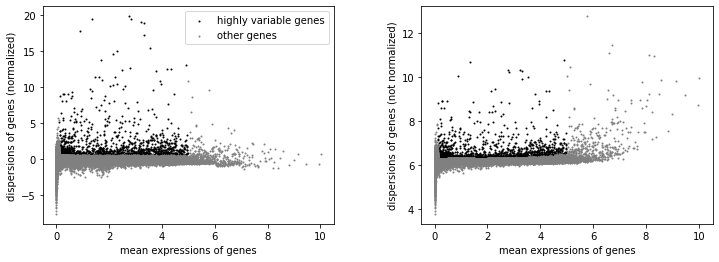

get 1710 highly variable cells


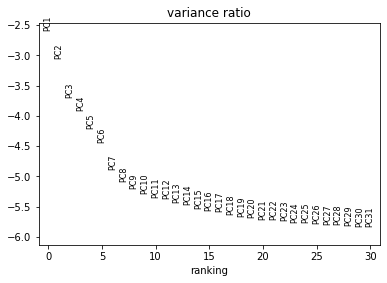

In [25]:
# Clustering
adata_kid.var_names_make_unique()
sc.pp.filter_cells(adata_kid, min_genes=200)
sc.pp.filter_genes(adata_kid, min_cells=3)

bad_genes = adata_kid.var_names.str.startswith(('RPS', 'RPL', 'MT', 'HLA', 'MRPS', 'MRPL')) 
good_genes = ~ bad_genes
adata_kid = adata_kid[:, good_genes]
print('Number of genes after cell filter: {:d}'.format(adata_kid.n_vars))

sc.pp.highly_variable_genes(adata_kid, min_mean=0.125, max_mean=5, min_disp=0.5)
sc.pl.highly_variable_genes(adata_kid)
print('get {:d} highly variable cells'.format(adata_kid.var.highly_variable.sum()))

sc.tl.pca(adata_kid, use_highly_variable=True, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_kid, log=True)

sc.pp.neighbors(adata_kid, n_neighbors=10, n_pcs=15)
sc.tl.umap(adata_kid)

# UMAP plots

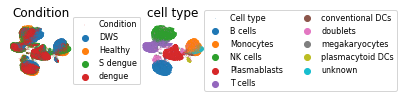

In [30]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (1, 1)}):
    axs = sc.pl.umap(adata_kid, 
               color=['Condition', 'cell_type_new',], 
               wspace=0.8, frameon=False, show=False, vmin=0, vmax=12)
fig=plt.gcf()

axs[1].set_title('cell type')

lg1 = axs[0].legend()
lg2 = axs[1].legend()
for lgnd in [lg1, lg2]:
    for handle in lgnd.legendHandles:
        handle.set_sizes([6.0])

axs[0].legend(labels=['Condition', 'DWS', 'Healthy', 'S dengue', 'dengue'],  loc='right', 
              bbox_to_anchor=(2.05, 0.5),bbox_transform=axs[0].transAxes, fontsize=8)

h, l = axs[1].get_legend_handles_labels()
ln = [i.replace('_', ' ') for i in l]
axs[1].legend(labels=['Cell type'] + ln, loc='right', 
                ncol=2, bbox_to_anchor=(3.9,0.5),bbox_transform=axs[1].transAxes, fontsize=8)

fig.savefig(save_figures + 'UMAP_cd_ct.png', dpi=300, bbox_inches='tight')

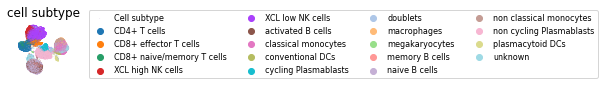

In [196]:
with rc_context({'figure.figsize': (1, 1)}):
    ax = sc.pl.umap(adata_kid, 
               color=['cell_subtype_new',], 
               frameon=False, show=False, vmin=0, vmax=12)
fig=plt.gcf()

#axs[0].set_title('condition')
ax.set_title('cell subtype')

lgnd = ax.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([6.0])

h, l = ax.get_legend_handles_labels()
ln = [i.replace('_', ' ') for i in l]
ax.legend(labels=['Cell subtype'] + ln, loc='right', 
                ncol=4, bbox_to_anchor=(10.5,0.6),bbox_transform=ax.transAxes, fontsize=8)

fig.savefig(save_figures + 'UMAP_cst.png', dpi=300, bbox_inches='tight')

In [42]:
def UMAP(colors, save_fd=False):
    with rc_context({'figure.figsize': (1, 1)}):
        axs = sc.pl.umap(adata_kid, 
                   color=colors, 
                   wspace=0.5, ncols=4, frameon=False, show=False, vmin=0, vmax=12)
    fig=plt.gcf()
    if save_fd is not False:
        fig.savefig(save_figures + save_fd, dpi=300, bbox_inches='tight')
    return fig

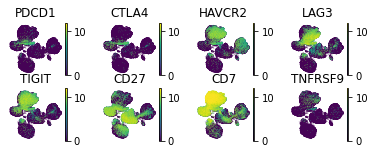

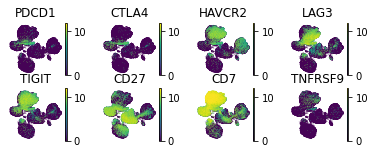

In [45]:
g_list = ['PDCD1', 'CTLA4', 'HAVCR2', 'LAG3', 'TIGIT', 'CD27', 'CD7', 'TNFRSF9']
UMAP(g_list, save_fd='Tregs/UMAP_immune_checkpoints.png')

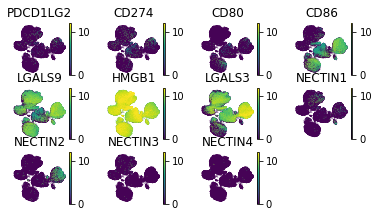

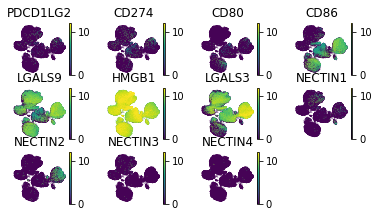

In [48]:
g_list = ['PDCD1LG2', 'CD274',
          'CD80', 'CD86', # 'CTLA4'
          'LGALS9', 'HMGB1', #'CEACAM1',
          'LGALS3', #'CLEC4G',
          'NECTIN1', 'NECTIN2', 'NECTIN3', 'NECTIN4',
         ]
UMAP(g_list, save_fd='Tregs/UMAP_immune_checkpoints_ligands.png')

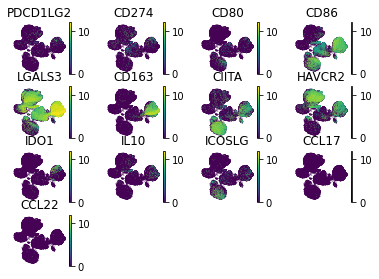

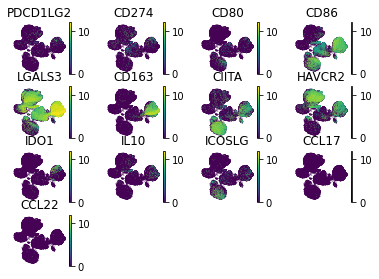

In [60]:
g_list = ['PDCD1LG2', 'CD274',
          
          'CD80', 'CD86', # 'CTLA4'
          
          'LGALS3', #'CLEC4G',
          
          'CD163',
          'CIITA',
          'HAVCR2', 'IDO1',
          'IL10',
           'ICOSLG',
          
          'CCL17',
          'CCL22',
         ]
UMAP(g_list, save_fd='Tregs/UMAP_Treg_inducing_genes2.png')

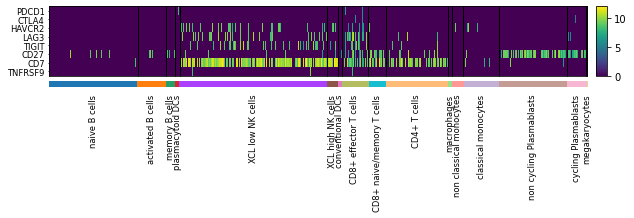

In [228]:
csts = adata_kid.obs['cell_subtype_new'].unique().tolist()
csts.remove('unknown')
csts.remove('doublets')
adata_plot = adata_kid[adata_kid.obs['cell_subtype_new'].isin(csts)]

from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['naive B cells',
                                         'activated B cells',
                                         'memory B cells',
                                        'plasmacytoid DCs',
                                         'XCL_low NK cells',
                                         'XCL_high NK cells',
                                        'conventional DCs',
                                         'CD8+ effector T cells',
                                         'CD8+ naive/memory T cells',
                                         'CD4+ T cells',
                                         'macrophages',
                                         'non_classical monocytes',
                                         'classical monocytes',
                                         'non_cycling Plasmablasts',
                                         'cycling Plasmablasts',
                                        'megakaryocytes'
                                         ], ordered=True)
adata_plot.obs['cell_subtype_new'] = adata_plot.obs['cell_subtype_new'].astype(cat_type)


axs = sc.pl.heatmap(adata_plot, 
                    var_names = ['PDCD1', 'CTLA4', 'HAVCR2', 'LAG3', 'TIGIT', 'CD27', 'CD7', 'TNFRSF9'], 
                    groupby='cell_subtype_new',
                    show=False, vmin=0, vmax=12, swap_axes=True)
# 'heatmap_ax', 'groupby_ax'
axs['groupby_ax'].set_xlabel(None)

xticklabels = []
for i in axs['groupby_ax'].get_xticklabels():
    xticklabels.append(i.get_text().replace('_', ' '))
axs['groupby_ax'].set_xticklabels(xticklabels)   

fig=plt.gcf()
fig.savefig(save_figures + 'heatmap_imm_check_cst.png', dpi=300, bbox_inches='tight')

# heatmap showing log2foldchange

In [7]:
ct_pair = pd.read_csv(save_tabels + 'ct_data_pair_gene_cut_0.tsv', sep='\t', index_col=['cell_subtype', 'gene'])
ct_log2FC = pd.read_csv(save_tabels + 'ct_log2FC_gene_cut_0.tsv', sep='\t', index_col=0)

cst_pair = pd.read_csv(save_tabels + 'cst_data_pair_gene_cut_0.tsv', sep='\t', index_col=['cell_subtype', 'gene'])
cst_log2FC = pd.read_csv(save_tabels + 'cst_log2FC_gene_cut_0.tsv', sep='\t', index_col=0)

In [32]:
def heatmap_cst(g_list, title, save_fd=False):
    
    df = cst_pair.reset_index().set_index('gene').loc[g_list][['cell_subtype', 'med_pair']]

    cst_order=['naive B cells',
               'activated B cells',
               'memory B cells',
                              
               'non_cycling Plasmablasts',
               'cycling Plasmablasts',
               
               'XCL_high NK cells',
               'XCL_low NK cells',
               
               'CD4+ T cells',
               'CD8+ effector T cells',
               'CD8+ naive/memory T cells',
                 
               'classical monocytes',
               'non_classical monocytes',
               'macrophages',
               
               'conventional DCs',
               'plasmacytoid DCs',
               'megakaryocytes'
                 ]

    df_new = pd.DataFrame(np.zeros([len(df.index.unique()), 16]), columns=cst_order, index=df.index.unique())

    for idx in df_new.index:    
        for col in df_new.columns:
            df_new.at[idx, col] = df.loc[idx][df.loc[idx]['cell_subtype'] == col]['med_pair'][0]

    # fig, ax = plt.subplots(figsize=[3, 5], dpi=300)
    # cmap = sns.diverging_palette(245, 5, as_cmap=True)
    # ax = sns.heatmap(df_new.T, cmap=cmap, center=0, yticklabels=True,
#     cbar_kws={'label': 'Pairwise log2 fold change\n[SD vs D]'})
    # ax.set_title(title, x=0.5, y=1.05)
    # ax.set_xlabel(None)
    # ylabels = [label.get_text().replace('_', ' ') for label in ax.get_yticklabels()]
    # ax.set_yticklabels(ylabels)

    fig, ax = plt.subplots(figsize=[6, 0.3125 * len(g_list)], dpi=300)
    cmap = sns.diverging_palette(245, 5, as_cmap=True)
    ax = sns.heatmap(df_new, cmap=cmap, center=0, xticklabels=True, cbar_kws={'label': 'Pairwise log2 fold change\n[SD vs D]'})
    ax.set_title(title, x=0.5, y=1.05)
    ax.set_ylabel(None)
    xlabels = [label.get_text().replace('_', ' ') for label in ax.get_xticklabels()]
    ax.set_xticklabels(xlabels)

    if save_fd is not False:
        fig.savefig(save_figures + save_fd, bbox_inches='tight')

    return {'figure': fig, 'ax': ax}

## Immune checkpoints

{'figure': <Figure size 1800x750 with 2 Axes>,
 'ax': <AxesSubplot:title={'center':'Immune checkpoints and costimulatory molecules'}>}

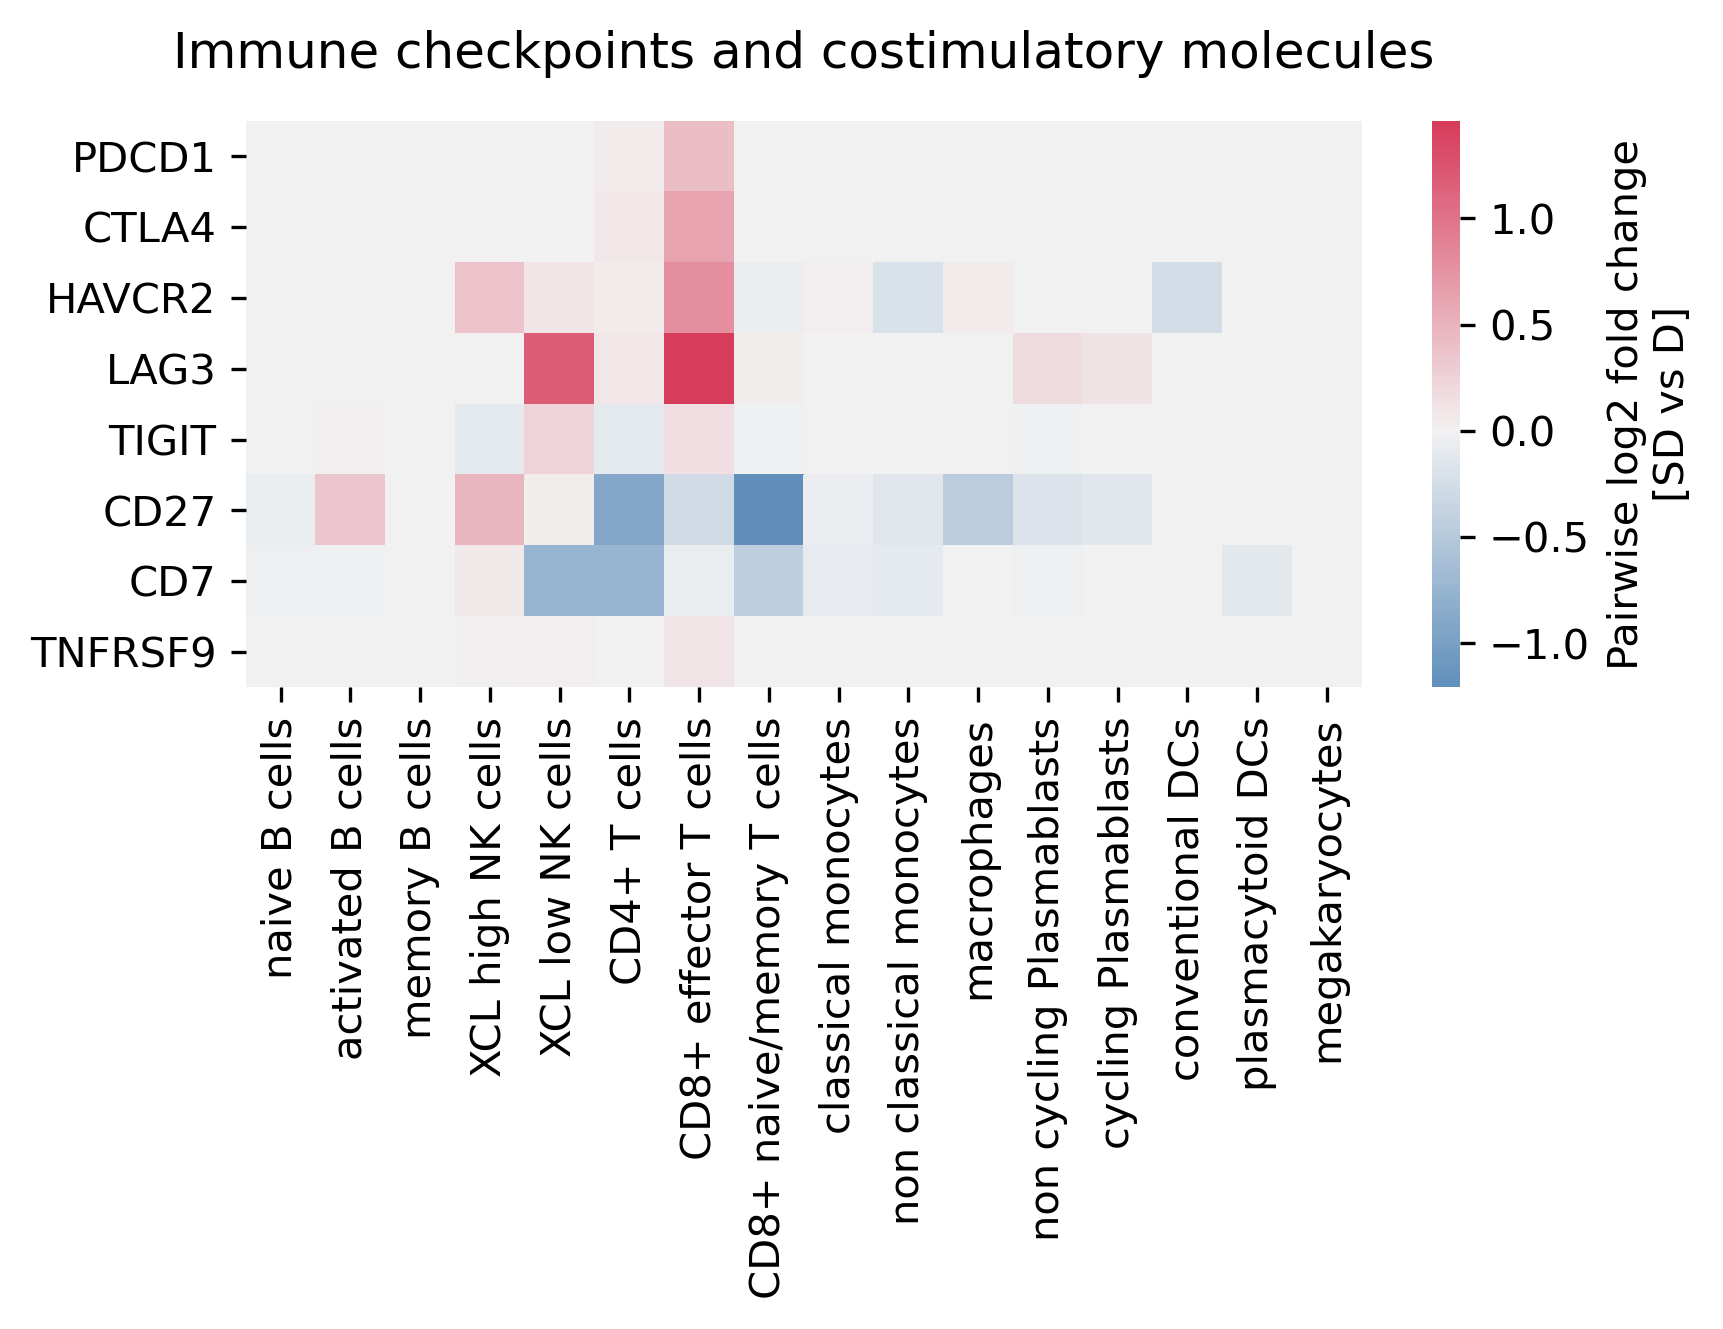

In [16]:
g_list = ['PDCD1', 'CTLA4', 'HAVCR2', 'LAG3', 'TIGIT', 'CD27', 'CD7', 'TNFRSF9']
heatmap_cst(g_list, 'Immune checkpoints and costimulatory molecules', save_fd='Tregs/Immune_checkpoints_log2_2.png')

{'figure': <Figure size 1800x1031.25 with 2 Axes>,
 'ax': <AxesSubplot:title={'center':'Ligands of immune checkpoints'}>}

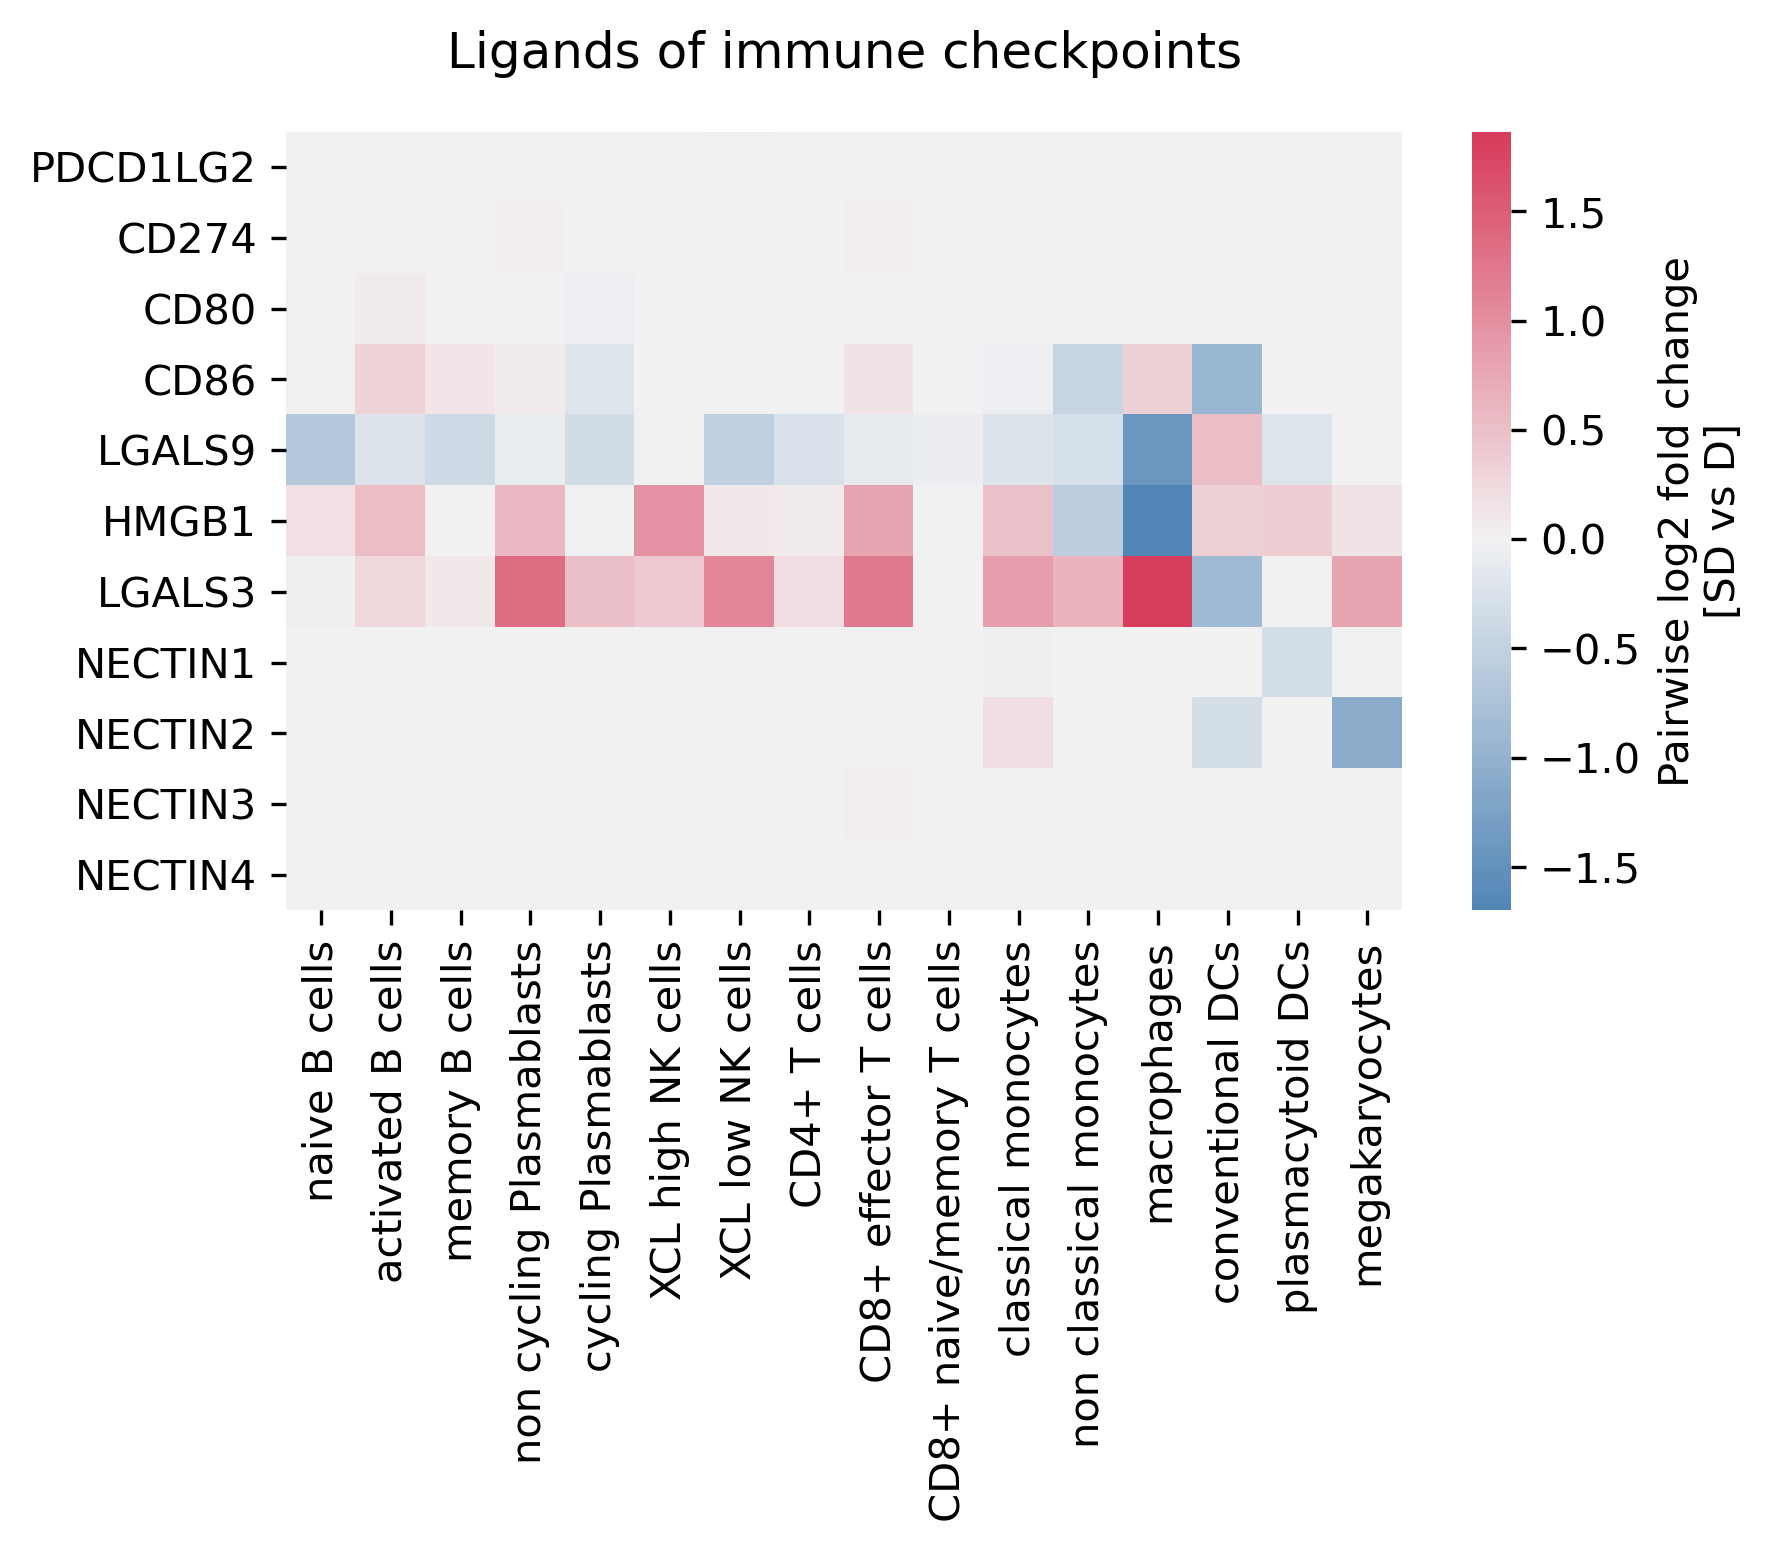

In [34]:
g_list = ['PDCD1LG2', 'CD274',
          'CD80', 'CD86', # 'CTLA4'
          'LGALS9', 'HMGB1', #'CEACAM1',
          'LGALS3', #'CLEC4G',
          'NECTIN1', 'NECTIN2', 'NECTIN3', 'NECTIN4',
         ]
heatmap_cst(g_list, 'Ligands of immune checkpoints', save_fd='Tregs/Immune_checkpoints_ligands_log2.png')

## Tregs

In [35]:
# g_list = ['PDCD1', 'CTLA4', 'HAVCR2', 'LAG3', 'ICOS', 'ENTPD1', 'IL2RA', 'FOXP3', 'TGFB1','IL10', 'IL12A', 'EBI3', 'CCL17', 'CCL22']
# # , 'PRF1', 'GZMA'
# heatmap_cst(g_list, 'Treg inducing genes', save_fd='Tregs/Treg_inducing_genes_log2.png')

{'figure': <Figure size 1800x1218.75 with 2 Axes>,
 'ax': <AxesSubplot:title={'center':'Treg inducing genes'}>}

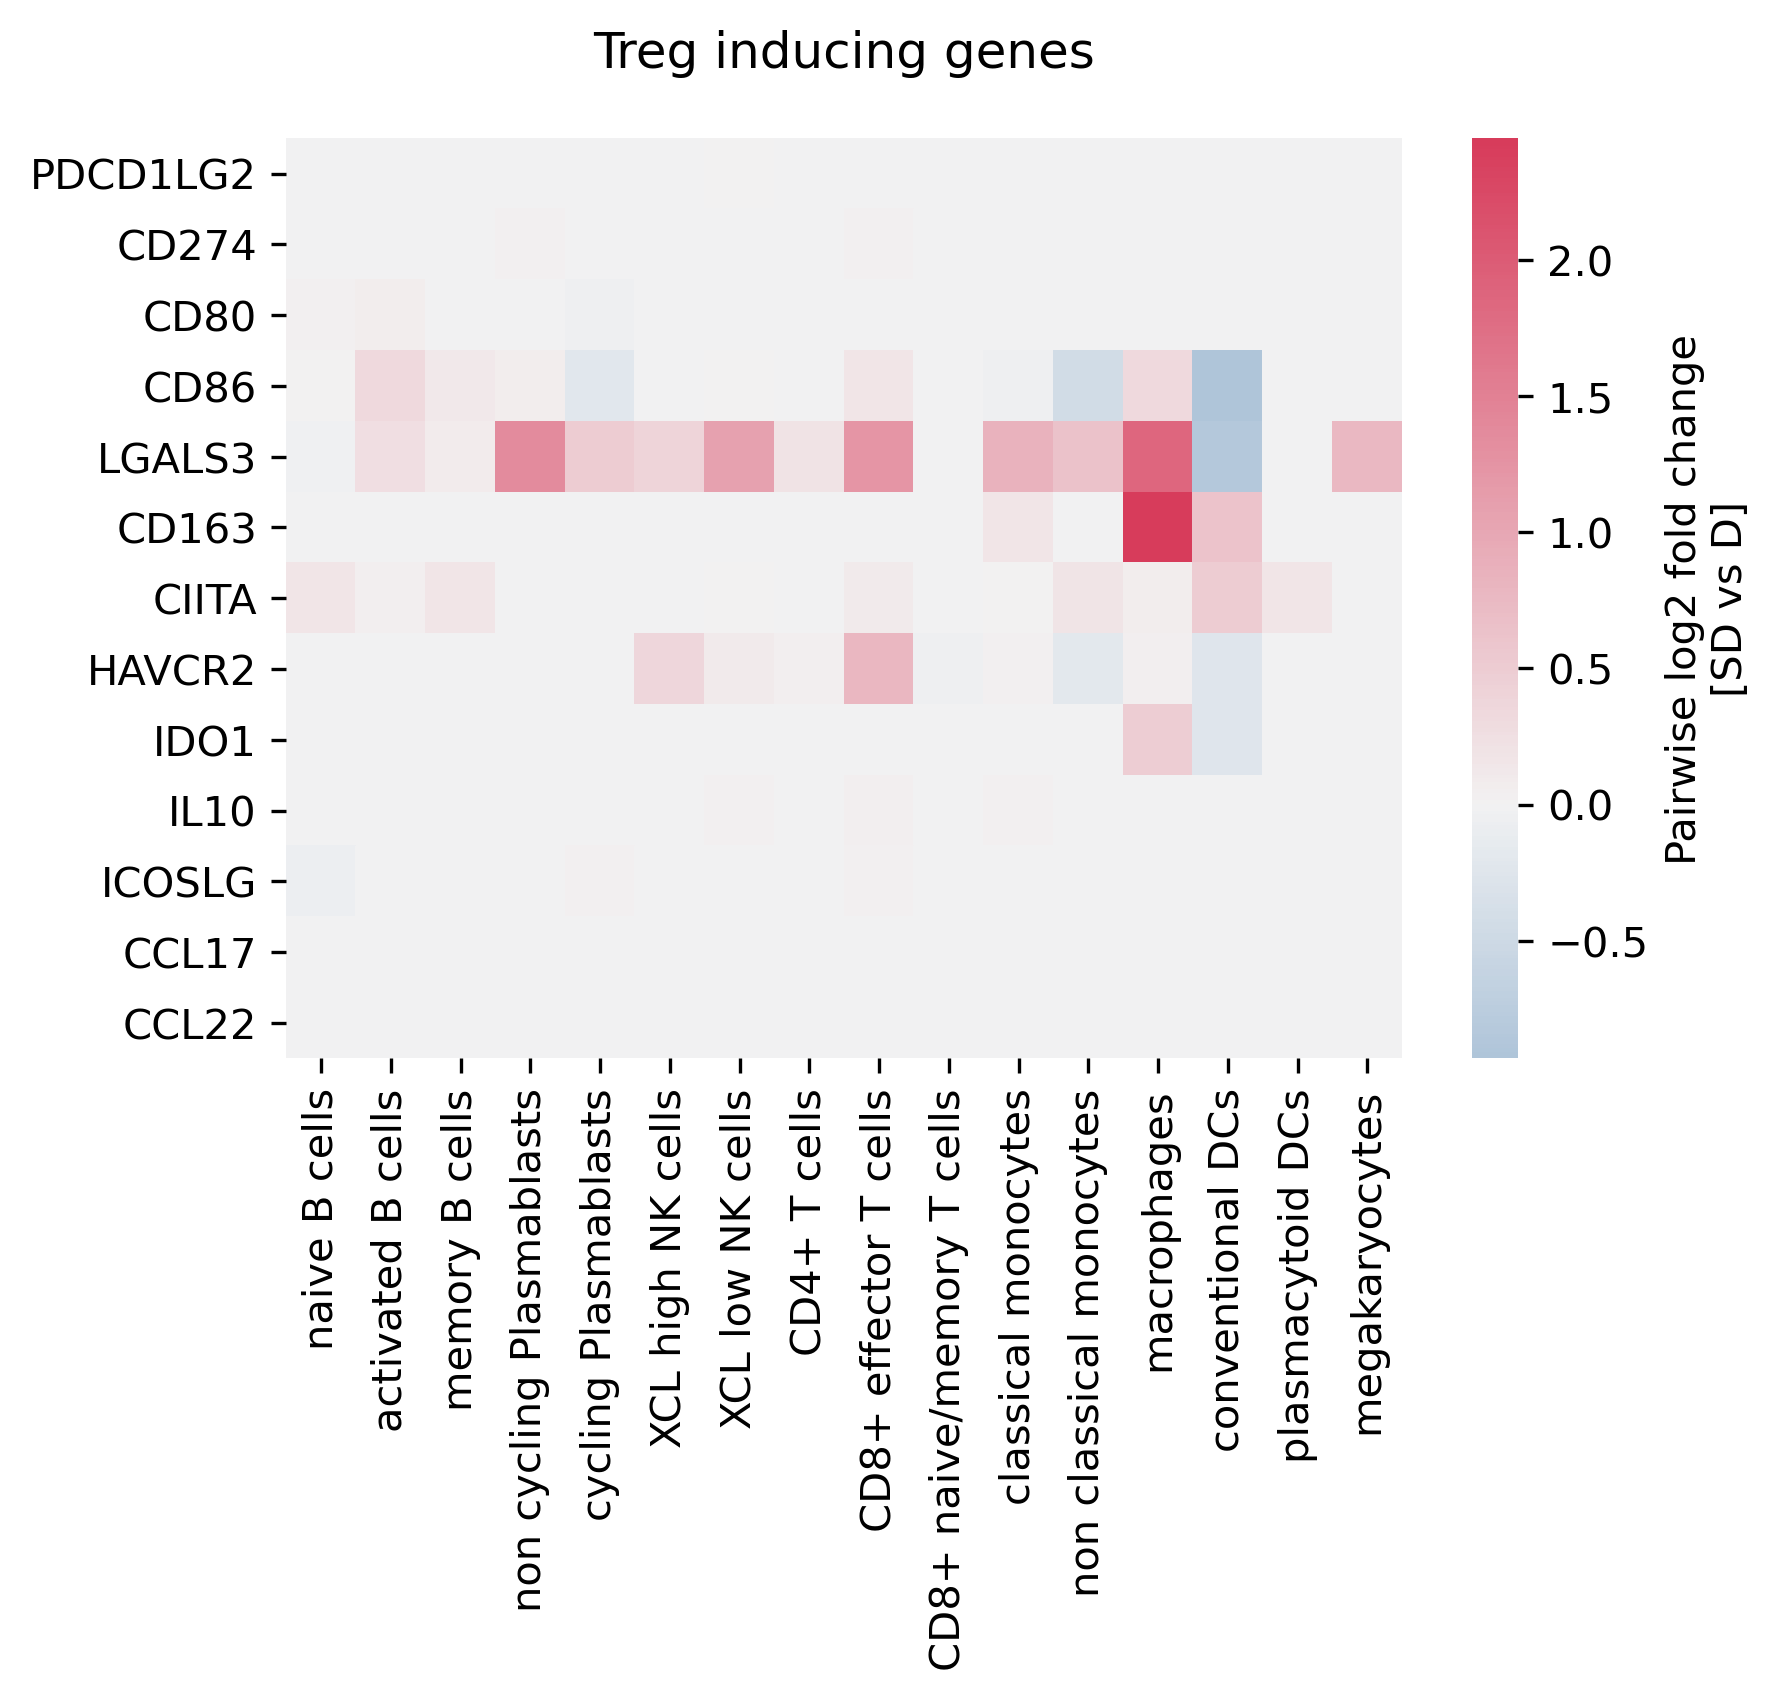

In [61]:
g_list = ['PDCD1LG2', 'CD274',
          
          'CD80', 'CD86', # 'CTLA4'
          
          'LGALS3', #'CLEC4G',
          
          'CD163',
          'CIITA',
          'HAVCR2', 'IDO1',
          'IL10',
           'ICOSLG',
          
          'CCL17',
          'CCL22',
         ]
heatmap_cst(g_list, 'Treg inducing genes', save_fd='Tregs/Treg_inducing_genes_2.png')

{'figure': <Figure size 1800x562.5 with 2 Axes>,
 'ax': <AxesSubplot:title={'center':'Coresponding genes'}>}

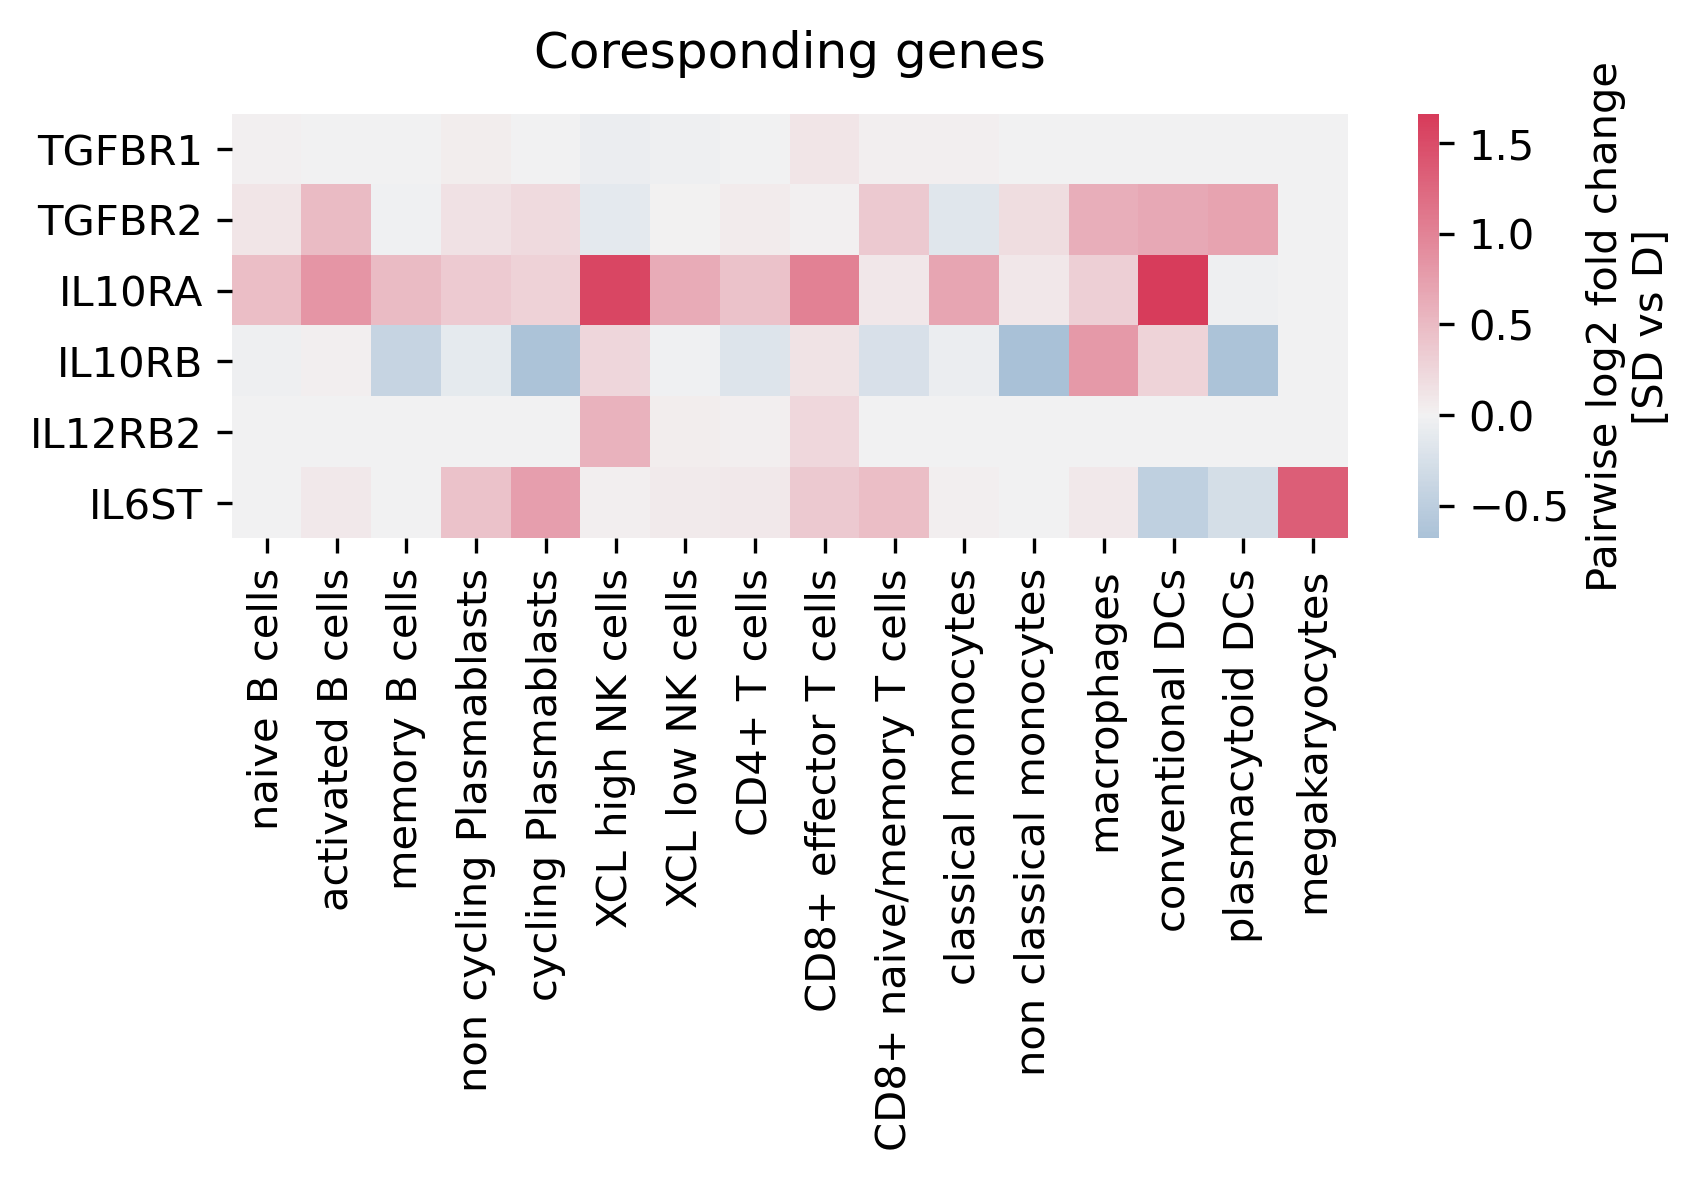

In [62]:
# receptors of chemokines

'''
'PDCD1': ['PDCD1LG2', 'CD274'],
'HAVCR2': ['LGALS9', 'BAG6'],
'CTLA4': ['CD80', 'CD86'],
'LAG3': ['LGALS3'],
'ICOS': ['ICOSLG'],
'ENTPD1': ['ADORA1', 'ADORA3', 'ADORA2A', 'ADORA2B'],
'IL2RA': ['IL2'],
'TGFB1': ['TGFBR1', 'TGFBR2'],
'IL10': ['IL10RA', 'IL10RB'],
'IL35': ['IL12RB2', 'IL6ST']
['CD163', 'CIITA', 'IDO1']
'''

rep_genes = [
#     'PDCD1LG2', 'CD274',
#              'CD80', 'CD86', # 'CTLA4'
#              'LGALS3',
#              'ICOSLG',
#              'ADORA1', 'ADORA3', 'ADORA2A', 'ADORA2B',
#              'LGALS9', #'BAG6', # 'ENTPD1'
             'TGFBR1', 'TGFBR2',
             'IL10RA', 'IL10RB',
             'IL12RB2', 'IL6ST',
#              'CD163', 'CIITA', 'IDO1', 'IL2',
            ]


heatmap_cst(rep_genes, 'Coresponding genes', save_fd='Tregs/genes_bind_Tregs.png')

# clustering and UMAP of NK cells in kids

/usr/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Number of genes after cell filter: 17321


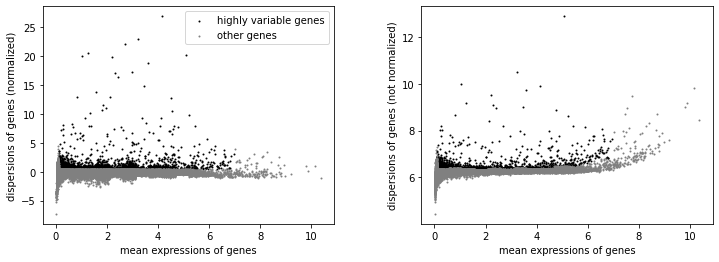

get 2364 highly variable cells


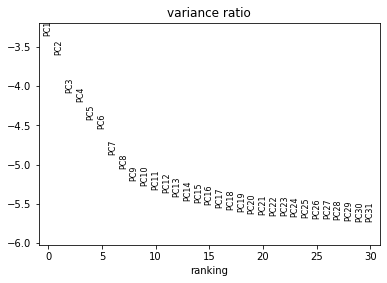

In [16]:
adata_NK = adata_kid[adata_kid.obs['cell_type_new'] == 'NK_cells']

# Clustering
adata_NK.var_names_make_unique()
sc.pp.filter_cells(adata_NK, min_genes=200)
sc.pp.filter_genes(adata_NK, min_cells=3)

bad_genes = adata_NK.var_names.str.startswith(('RPS', 'RPL', 'MT', 'HLA', 'MRPS', 'MRPL')) 
good_genes = ~ bad_genes
adata_adata_NK = adata_NK[:, good_genes]
print('Number of genes after cell filter: {:d}'.format(adata_NK.n_vars))

sc.pp.highly_variable_genes(adata_NK, min_mean=0.1, max_mean=7, min_disp=0.5)
sc.pl.highly_variable_genes(adata_NK)
print('get {:d} highly variable cells'.format(adata_NK.var.highly_variable.sum()))

sc.tl.pca(adata_NK, use_highly_variable=True, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_NK, log=True)

sc.pp.neighbors(adata_NK, n_neighbors=15, n_pcs=20)
sc.tl.umap(adata_NK)

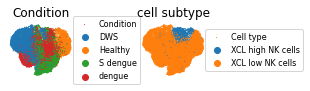

In [19]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (1, 1)}):
    axs = sc.pl.umap(adata_NK, 
               color=['Condition', 'cell_subtype_new',], 
               wspace=0.8, frameon=False, show=False, vmin=0, vmax=12)
fig=plt.gcf()

axs[1].set_title('cell subtype')

lg1 = axs[0].legend()
lg2 = axs[1].legend()
for lgnd in [lg1, lg2]:
    for handle in lgnd.legendHandles:
        handle.set_sizes([6.0])

axs[0].legend(labels=['Condition', 'DWS', 'Healthy', 'S dengue', 'dengue'],  loc='right', 
              bbox_to_anchor=(2.05, 0.5),bbox_transform=axs[0].transAxes, fontsize=8)

h, l = axs[1].get_legend_handles_labels()
ln = [i.replace('_', ' ') for i in l]
axs[1].legend(labels=['Cell type'] + ln, loc='right', 
                bbox_to_anchor=(2.5,0.5),bbox_transform=axs[1].transAxes, fontsize=8)

#fig.savefig(save_figures + 'UMAP_cd_ct.png', dpi=300, bbox_inches='tight')

In [22]:
def UMAP(colors, save_fd=False):
    with rc_context({'figure.figsize': (1, 1)}):
        axs = sc.pl.umap(adata_NK, 
                   color=colors, 
                   wspace=0.5, ncols=4, frameon=False, show=False, vmin=0, vmax=12)
    fig=plt.gcf()
    if save_fd is not False:
        fig.savefig(save_figures + save_fd, dpi=300, bbox_inches='tight')
    return fig

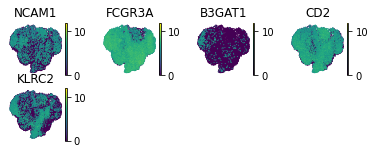

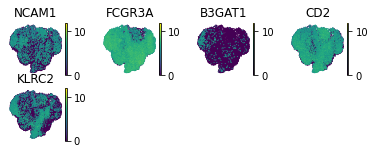

In [23]:
g_list = ['NCAM1', 'FCGR3A', 'B3GAT1', 'CD2', 'KLRC2']
UMAP(g_list, save_fd=False)

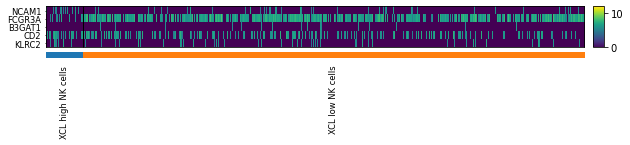

In [24]:
axs = sc.pl.heatmap(adata_NK, 
                    var_names = ['NCAM1', 'FCGR3A', 'B3GAT1', 'CD2', 'KLRC2'], 
                    groupby='cell_subtype_new',
                    show=False, vmin=0, vmax=12, swap_axes=True)
# 'heatmap_ax', 'groupby_ax'
axs['groupby_ax'].set_xlabel(None)

xticklabels = []
for i in axs['groupby_ax'].get_xticklabels():
    xticklabels.append(i.get_text().replace('_', ' '))
axs['groupby_ax'].set_xticklabels(xticklabels)   

fig=plt.gcf()
#fig.savefig(save_figures + 'heatmap_imm_check_cst.png', dpi=300, bbox_inches='tight')

{'mainplot_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

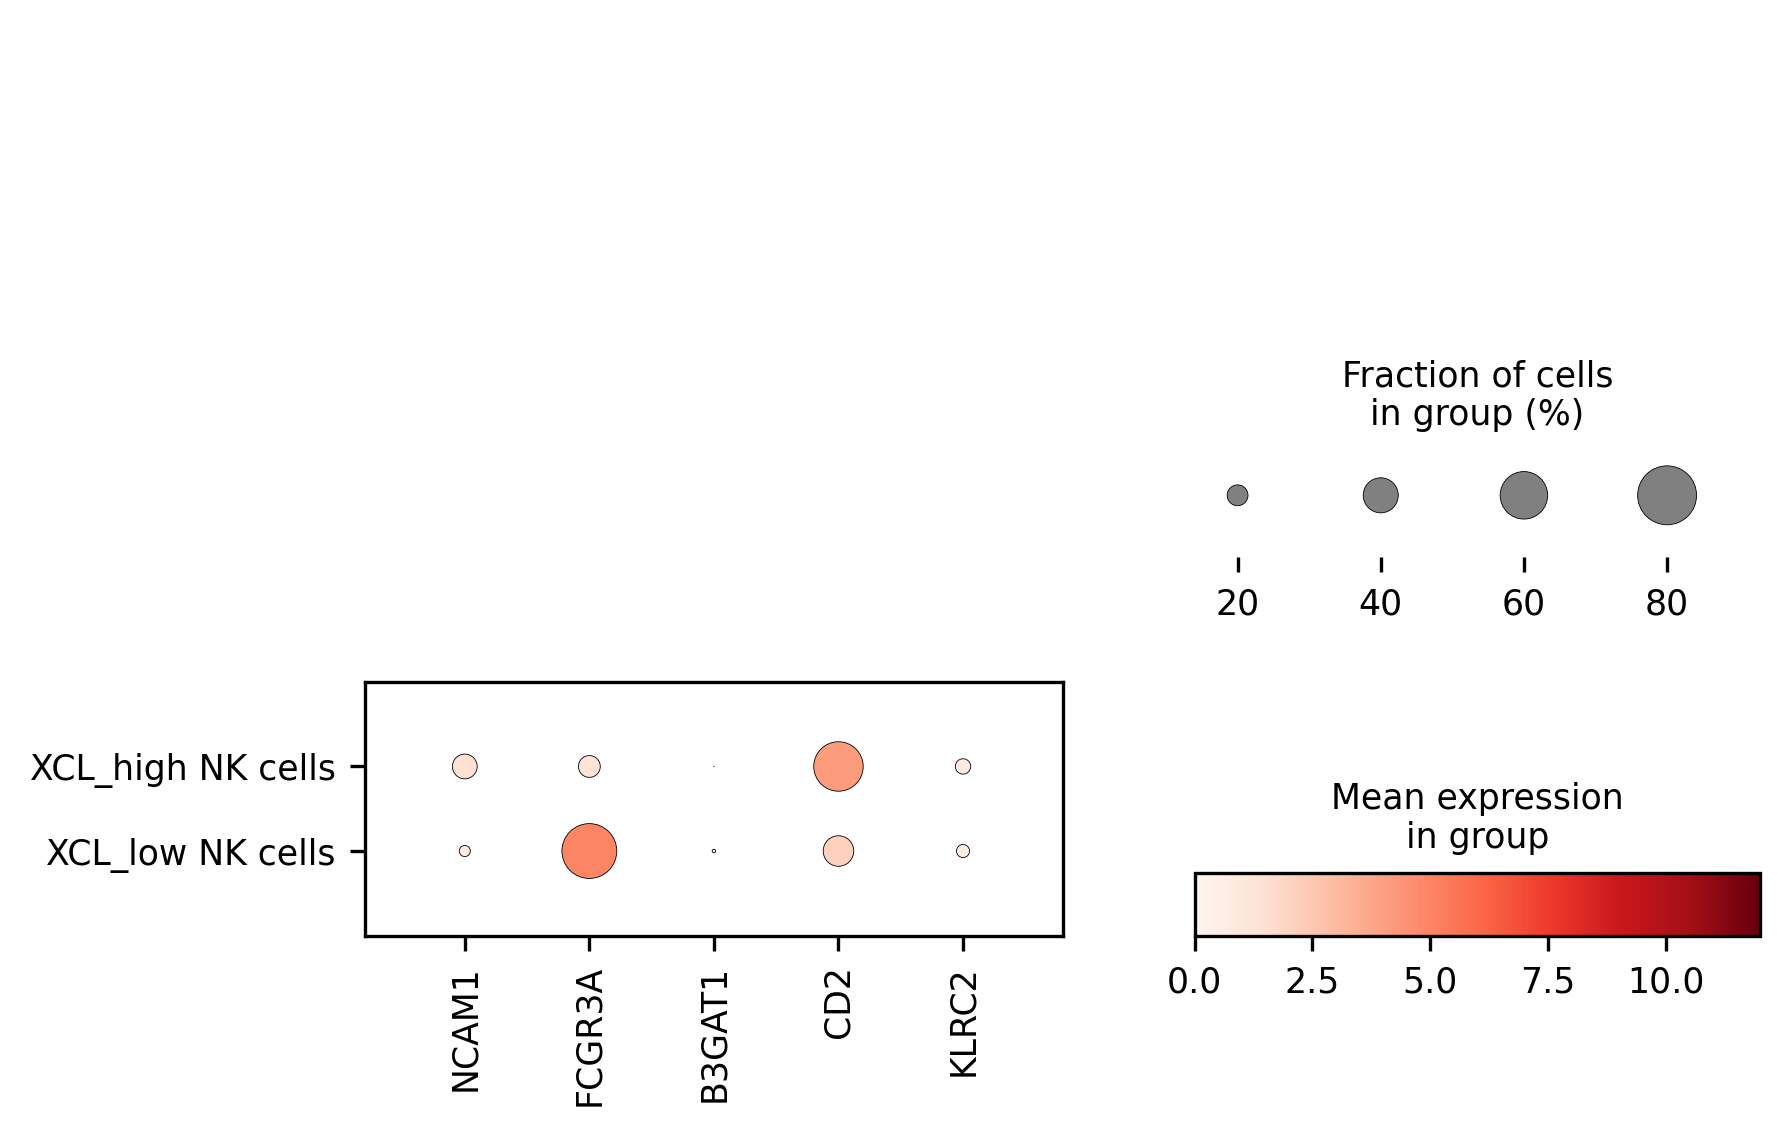

In [26]:
fig, ax = plt.subplots(dpi=300)
sc.pl.dotplot(adata_NK, 
                    var_names = ['NCAM1', 'FCGR3A', 'B3GAT1', 'CD2', 'KLRC2'], 
                    groupby='cell_subtype_new',
                    show=False, vmin=0, vmax=12, ax=ax)